In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import os

from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.mesher import PolygonalPrism
from fatiando.vis import mpl, myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from matplotlib.mlab import normpdf

/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")
/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/myv.py:51: UserWarning: This module will be removed in v0.7.
  warnings.warn("This module will be removed in v0.7.")


In [2]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun
import mag_sphere_functions as msf

# Input

### Importing Diorama TFA data

In [3]:
mypath = 'diorama_r1200_int10_z0350_dz500/'

In [4]:
with open(mypath+'diorama_inversion_'+mypath[8:31]+'.pickle') as w:
        di = pickle.load(w)

In [68]:
h = np.zeros(di['xp'].size) + 200.  # layer depth
A_tf = msf.sm_tf_sphere(di['xp'], di['yp'], di['zp'], di['xp'], di['yp'], h, di['main_field'][0], di['main_field'][1], di['inc_dec'][0], di['inc_dec'][1])

In [69]:
I = np.identity(di['xp'].size)
f0 = np.trace(np.dot(A_tf.T, A_tf))/di['xp'].size
u0 = 0.0001

In [70]:
vp = np.linalg.solve(np.dot(A_tf.T,A_tf) + u0*f0*I,np.dot(A_tf.T,di['observed_data']))

In [71]:
tf = np.dot(A_tf,vp)

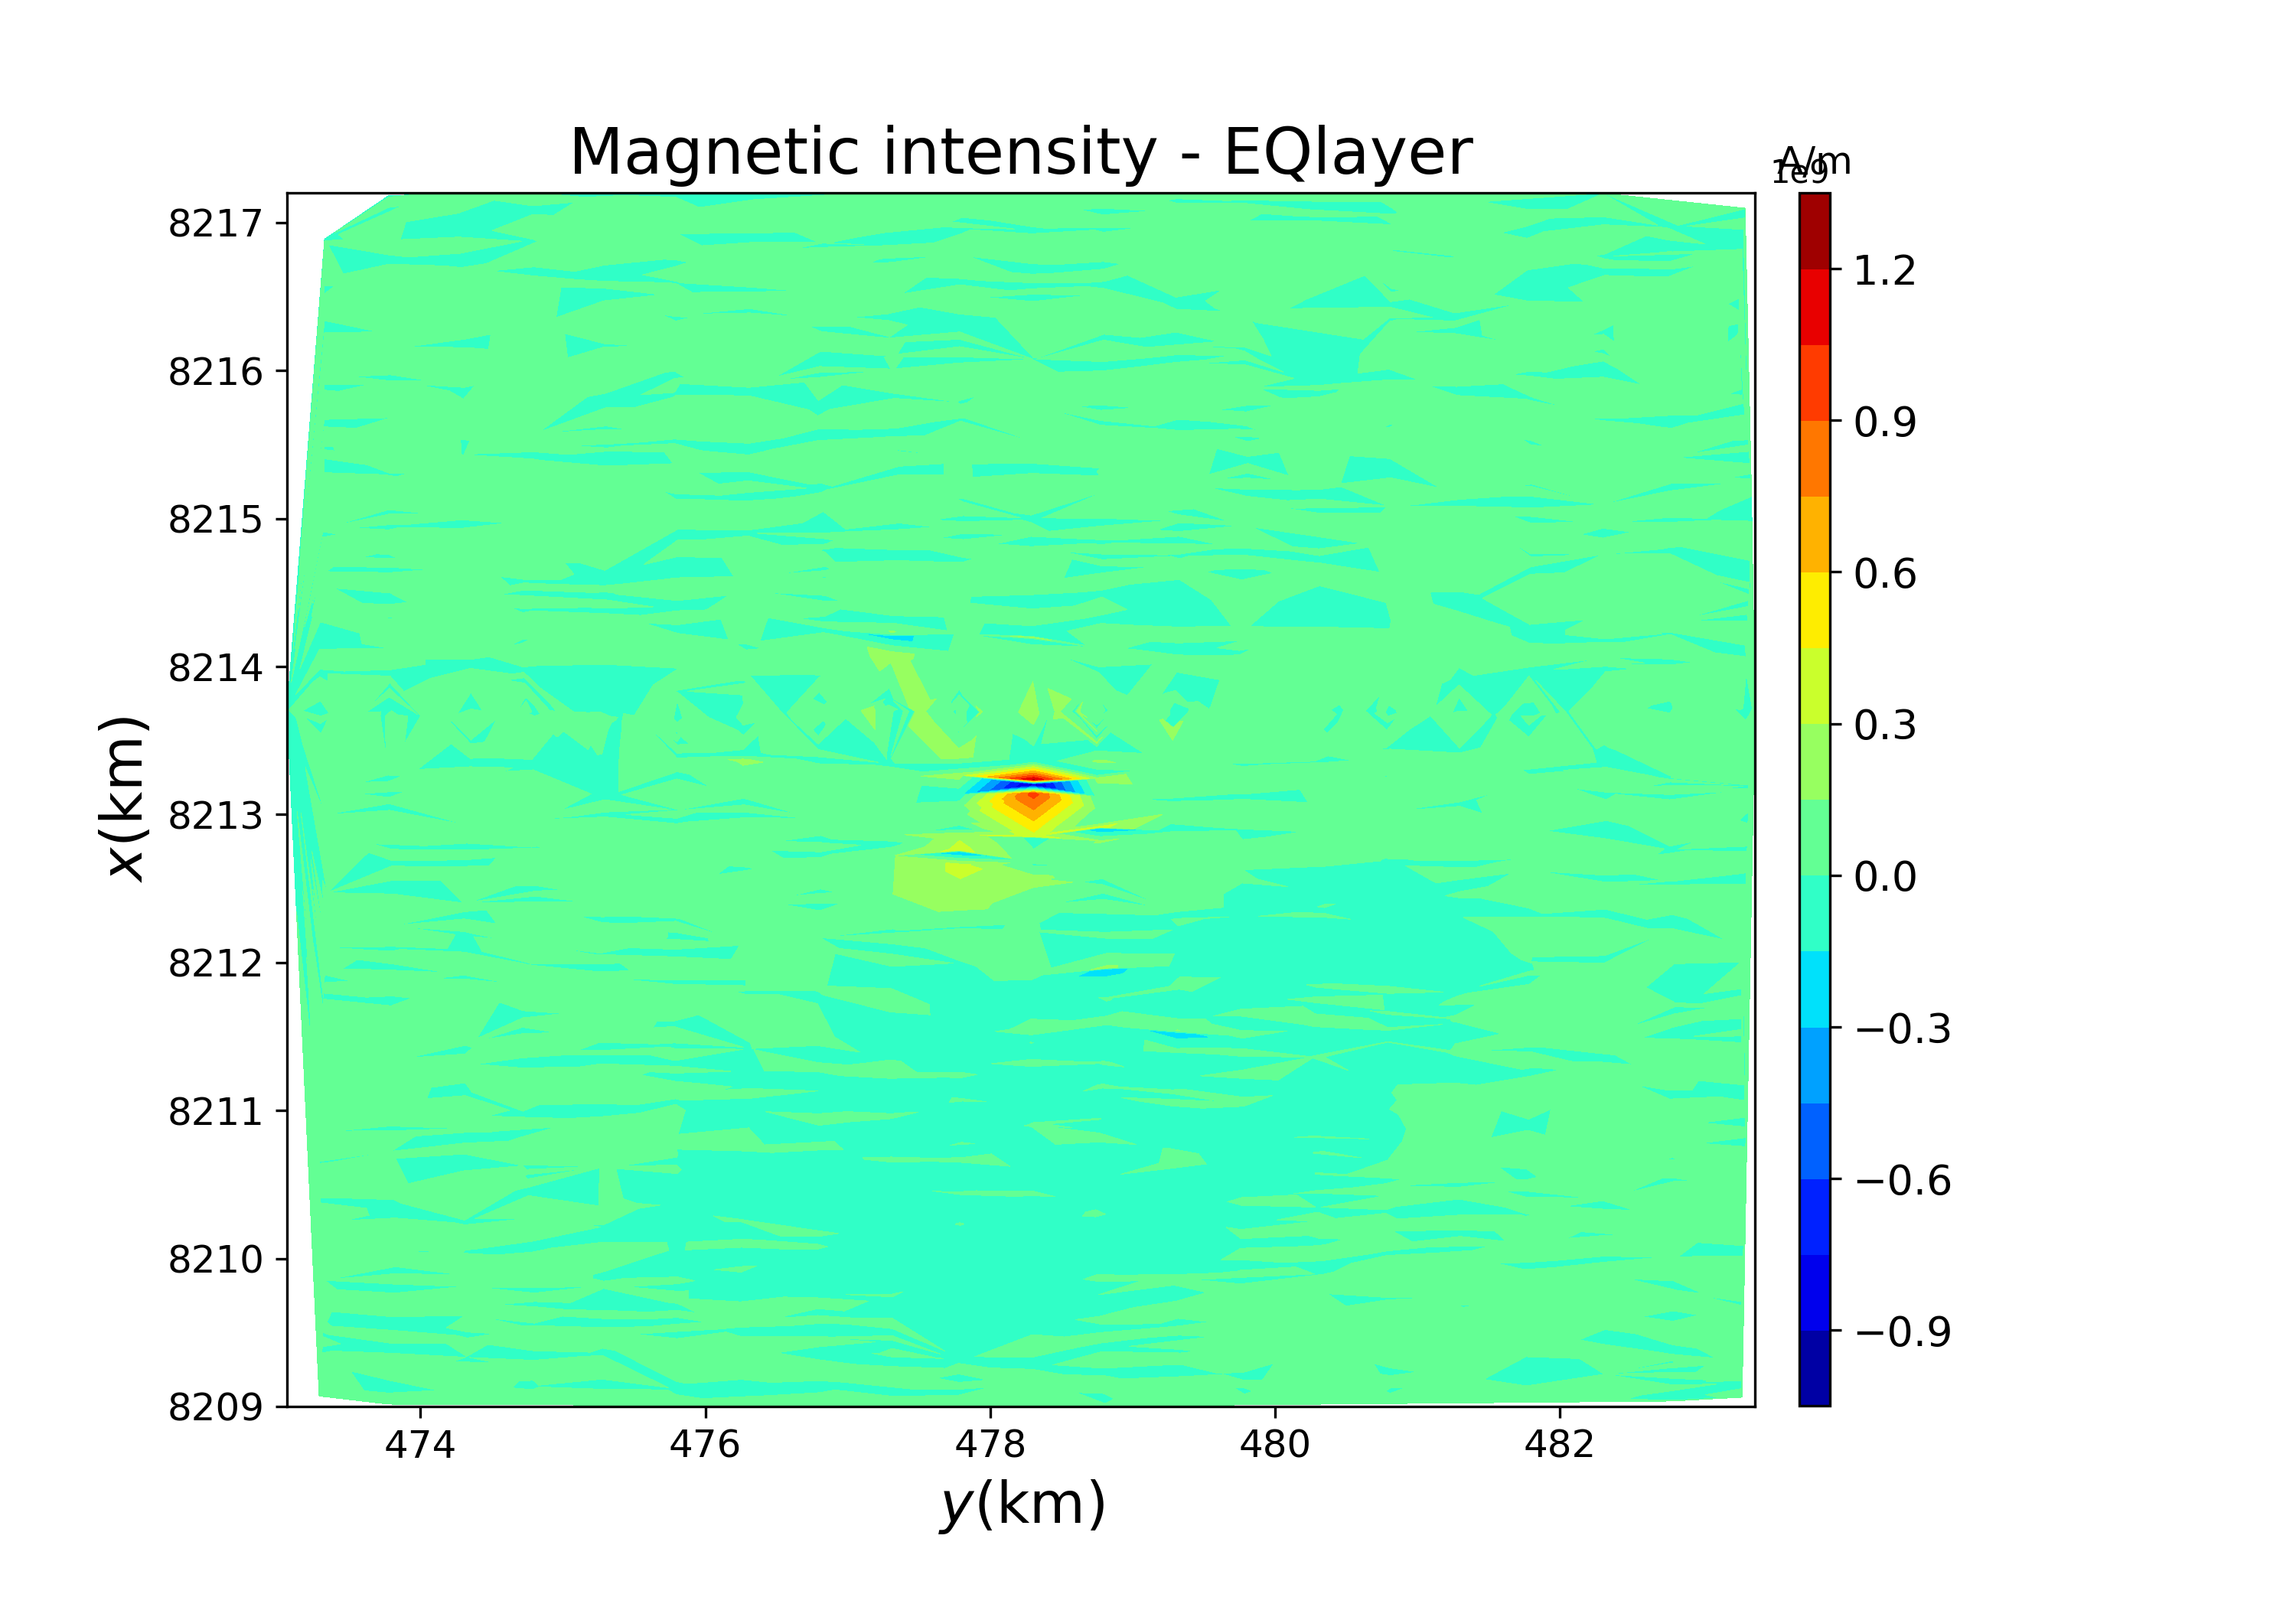

In [72]:
plt.figure(figsize=(10,7))
plt.title('Magnetic intensity - EQlayer', fontsize=20)
plt.tricontourf(di['yp'], di['xp'], vp, 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('A/m')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig('momentum_mag_intensity.png', dpi=300)
#plt.show()
img(filename='momentum_mag_intensity.png', width=1000, height=1200)

In [73]:
A_btb = msf.sm_btb_sphere(di['xp'], di['yp'], di['zp'], di['xp'], di['yp'], h, di['inc_dec'][0], di['inc_dec'][1])

In [74]:
mag_amp = np.dot(A_btb, vp)

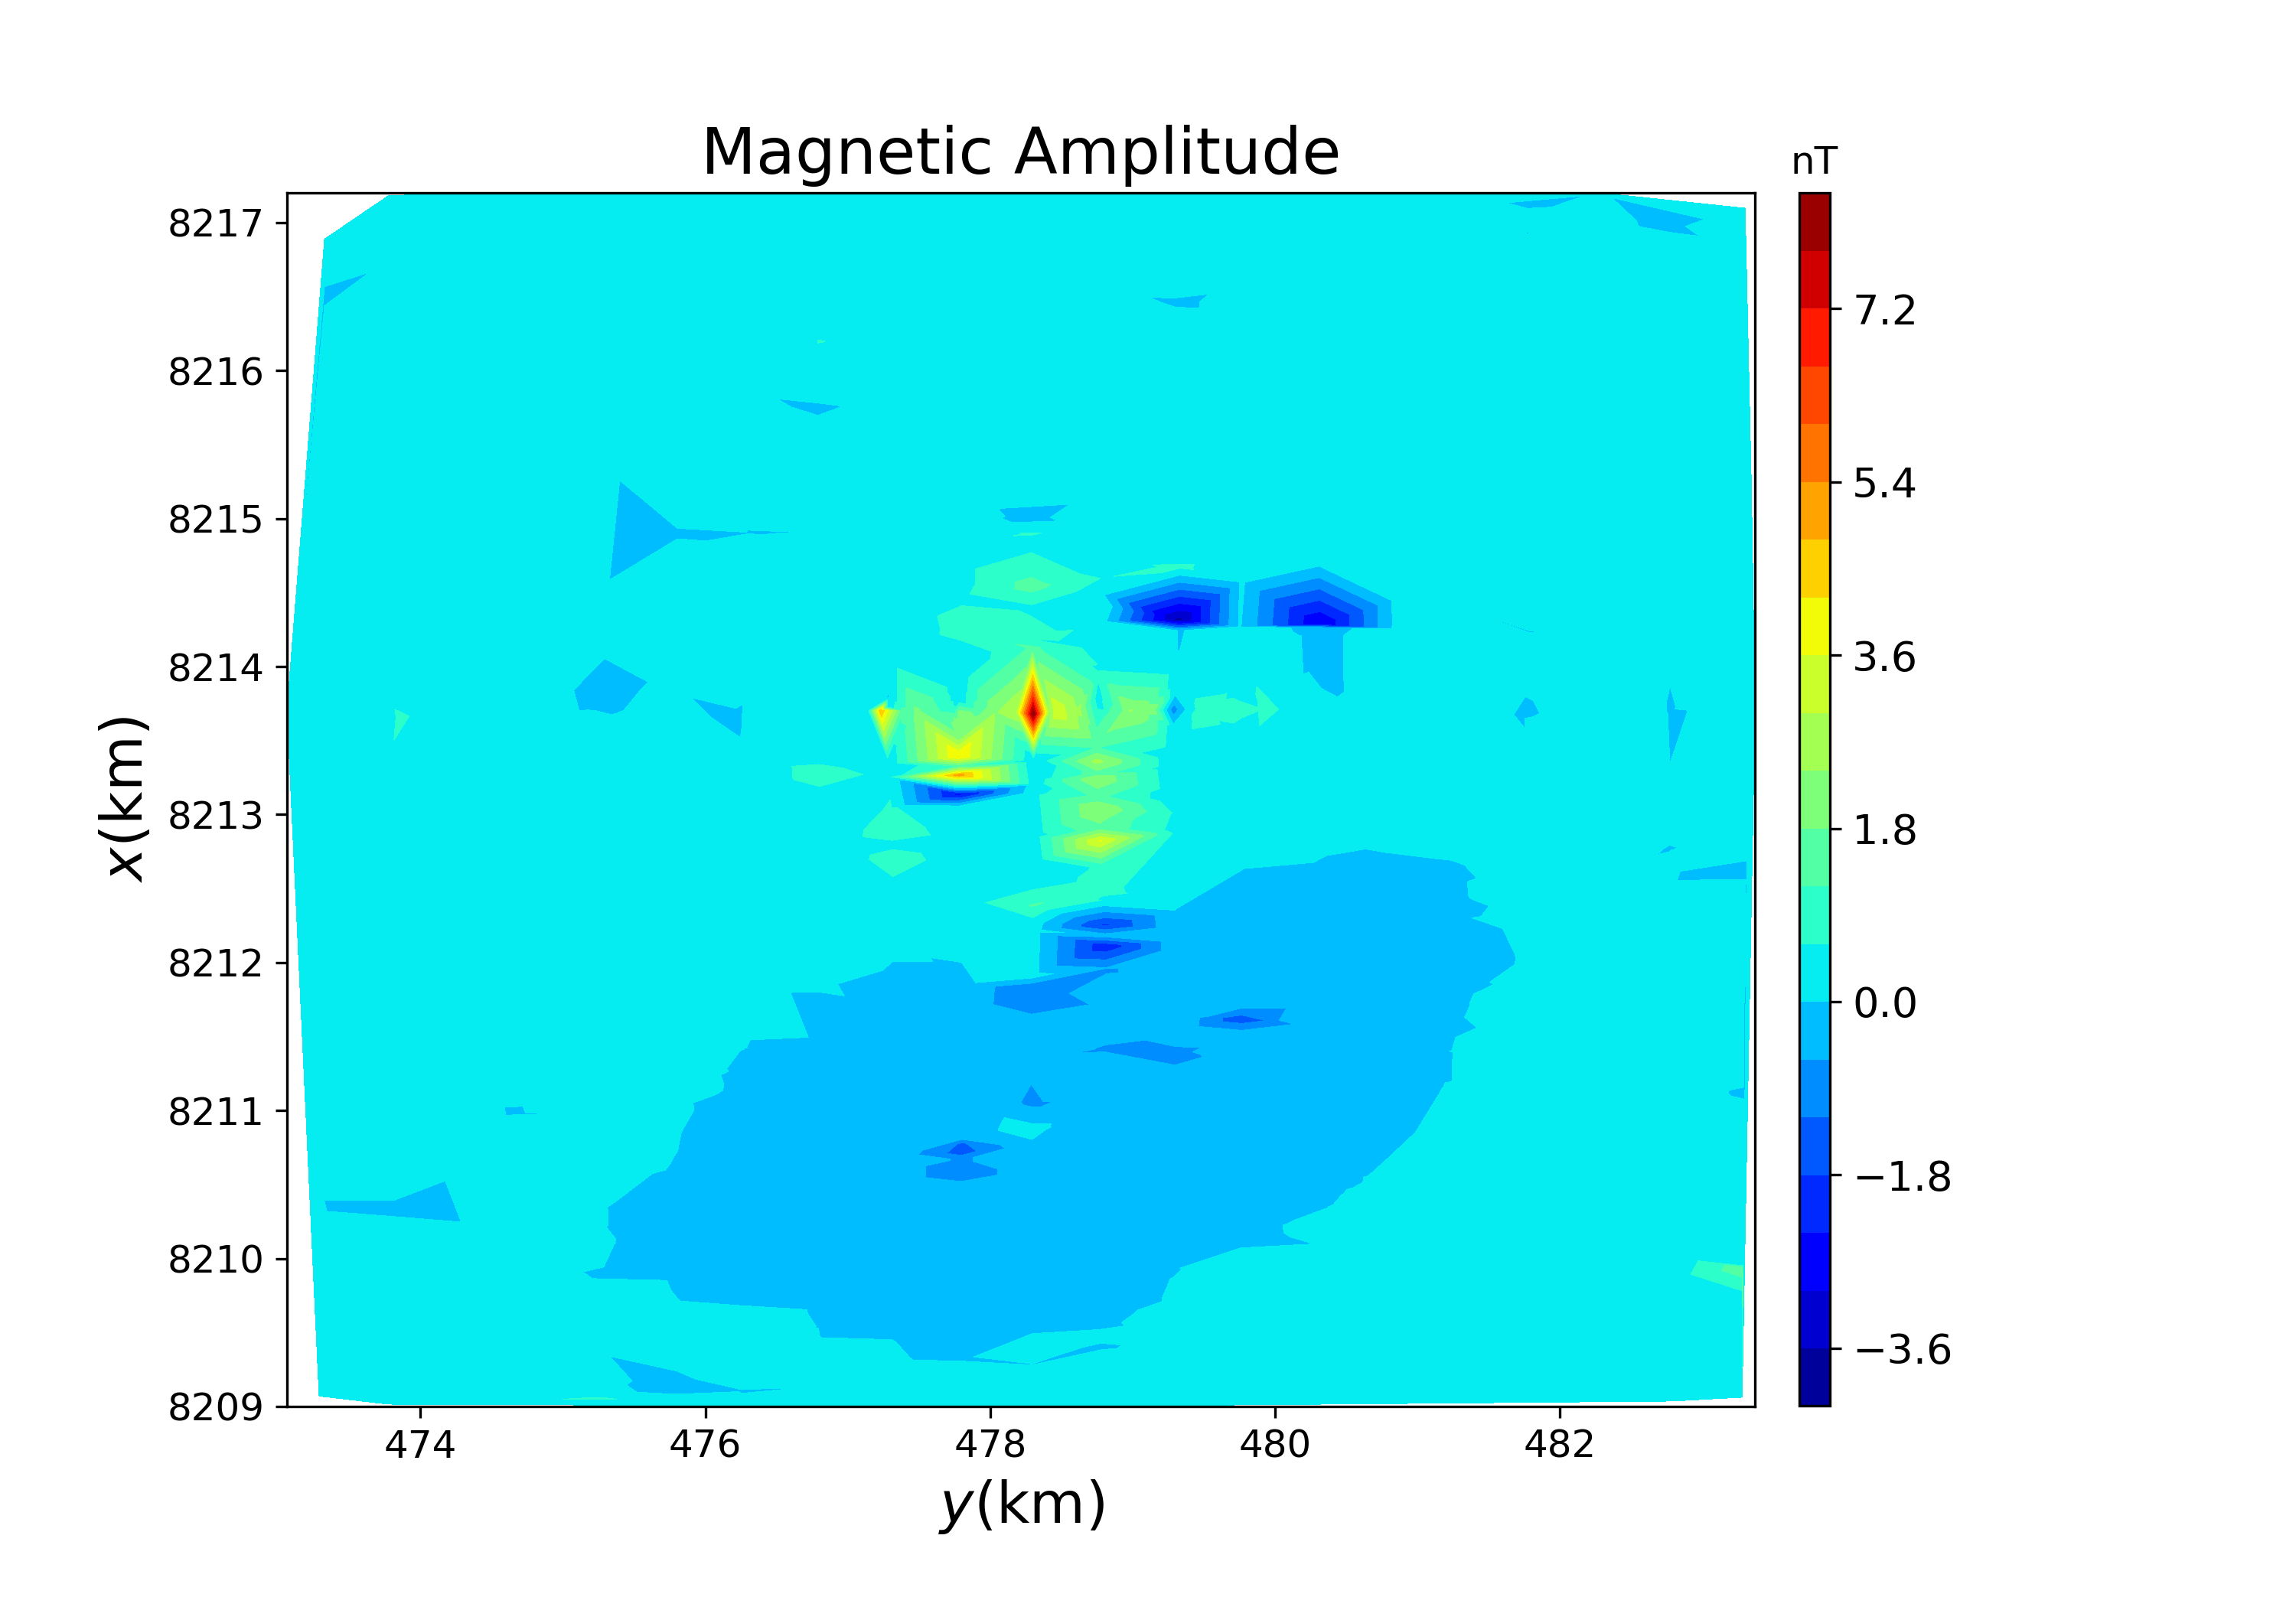

In [75]:
plt.figure(figsize=(10,7))
plt.title('Magnetic Amplitude', fontsize=20)
plt.tricontourf(di['yp'], di['xp'], mag_amp, 20, cmap='jet').ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1, edgecolor='black')
plt.savefig('magnetic_amplitude.png', dpi=300)
#plt.show()
img(filename='magnetic_amplitude.png', width=1000, height=1200)